In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns



In [39]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [40]:
import os
os.chdir('C:/Users/ak/Desktop/techbees/datasets')

In [35]:
#reading Dataset
cricket_act = pd.read_csv("cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [43]:
cricket_act.head(20)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,2
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0


In [41]:
cricket.head(20)

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,labels
0,2.955282,3.169333,0.764963,4.262328,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2
1,2.155179,2.138915,0.764963,2.609117,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,2
2,1.761908,1.924245,0.625397,2.400099,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,2
3,2.711183,2.897417,-0.840046,2.292041,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2
4,2.751866,2.682747,0.625397,1.984430,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,2
5,1.802592,1.709574,1.602358,1.625156,0.169465,1.930813,-0.512591,-0.193637,2.249953,1.145837,2
6,1.124538,1.194365,1.602358,1.562056,0.992383,1.953815,-0.649476,0.676941,2.434592,0.636337,0
7,0.894000,0.994006,-0.491131,1.476872,0.424501,1.806031,-0.567345,1.298783,1.572941,0.466504,0
8,1.341515,1.251610,0.695180,1.289939,0.108256,1.764438,-0.816780,0.055100,2.249953,-0.042996,0
9,0.731268,0.836581,0.136916,1.099063,0.332688,1.071840,0.021768,0.925678,1.019023,0.466504,0


In [27]:
cricket = cricket.drop(['Player','Span','HS'],axis=1)

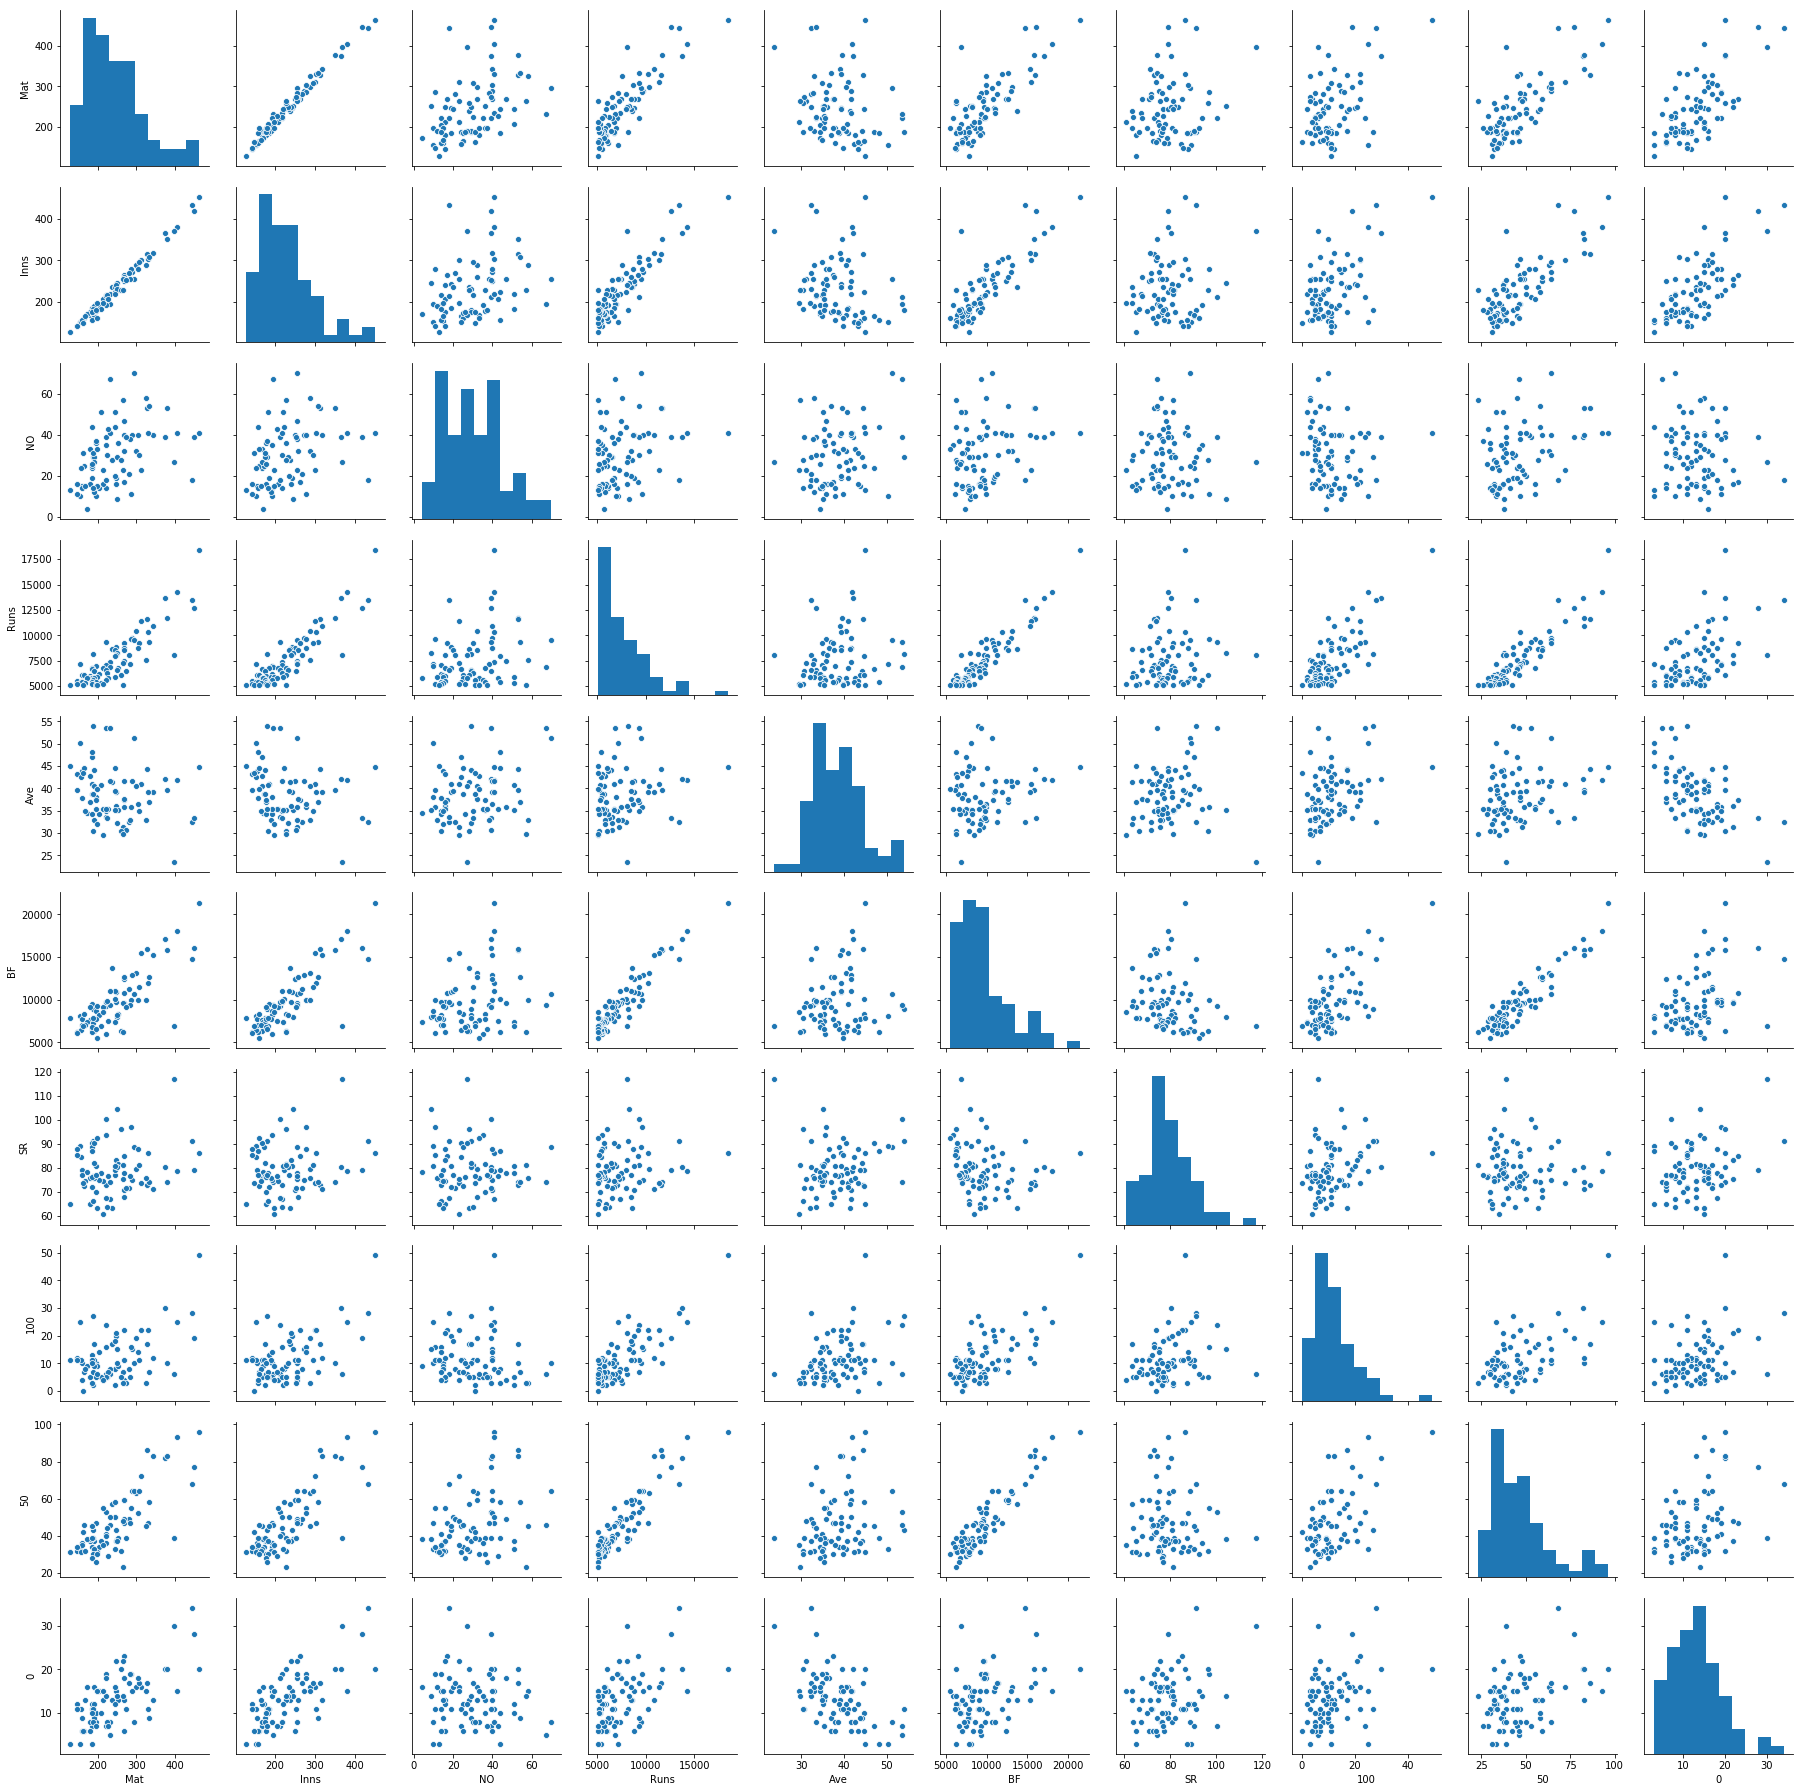

In [18]:
sns.pairplot(cricket)

In [44]:
cricket.isnull().sum()

Mat       0
Inns      0
NO        0
Runs      0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
labels    0
dtype: int64

In [30]:
cols = cricket.columns

In [28]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Fit your data on the scaler object
scaled_cricket = scaler.fit_transform(cricket)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
cricket = pd.DataFrame(scaled_cricket,columns=cols)

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(cricket)
labels = kmeans.predict(cricket)
centroids = kmeans.cluster_centers_

In [45]:
centroids

array([[ 0.5730551 ,  0.53206678,  0.89677504,  0.63747089,  0.55844264,
         0.75941415, -0.2212451 ,  0.2001962 ,  0.83438346, -0.20339375],
       [-0.83000468, -0.83969556, -0.25702019, -0.70562631,  0.31952494,
        -0.71909868,  0.01401621, -0.35411189, -0.65067384, -0.72232847],
       [ 2.35633503,  2.42037194,  0.59050531,  2.52886172,  0.08360247,
         2.35861851,  0.2384183 ,  1.89989602,  2.26021054,  1.62703055],
       [ 0.0532143 ,  0.08046369, -0.48822319, -0.19888462, -0.85245231,
        -0.23037944,  0.08822498, -0.16772663, -0.35038652,  0.67879528]])

In [49]:
cricket_act['labels']=labels

In [50]:
cricket_act.head(30)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0


In [ ]:
loss =[]
k-value = range(1,10)
for k in k-value:
    kmeans = Kmeans(n_clusters=k)
    kmeans.fit(cricket)
    l = wcss(kmean.predict(cricket))
    loss.appnd(l)
    
plt.plot(loss, k-value)    